## K-Means - Exemplo 2

### Importação dos dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("clustering_data.csv", sep=";")

### Análise Exploratória

In [3]:
data.head()

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


In [4]:
print("Total de dados:", len(data))

missing_data = data.isna().any()

print(missing_data)

Total de dados: 2297
f1    True
f2    True
dtype: bool


#### Removendo dados missing

In [5]:
data = data.dropna()
print("Total de dados:", len(data))

Total de dados: 1703


In [6]:
data.head()

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


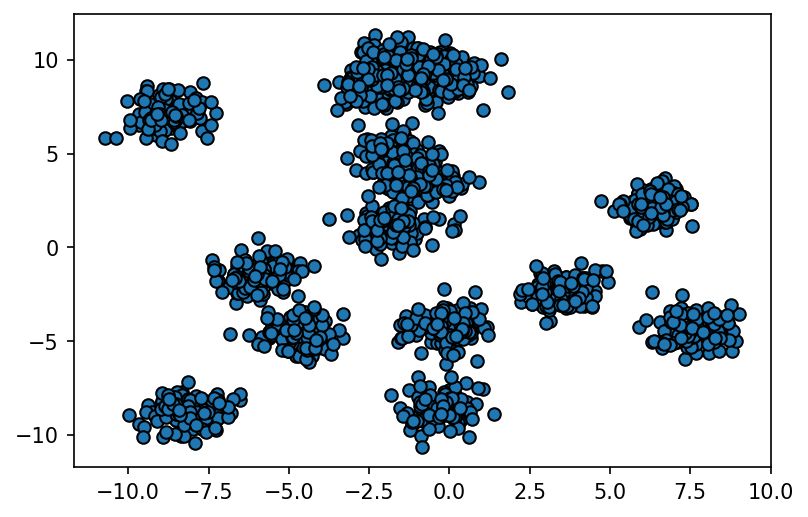

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.scatter(data["f1"], data["f2"], marker="o", edgecolor="black")
plt.show()

#### Arrumando formatação dos dados

In [8]:
import numpy as np

dados_temp = []

for row in data.itertuples():
  aux = [row.f1, row.f2]
  dados_temp.append(aux)

data = np.array(dados_temp)

In [9]:
data

array([[ 0.01863667,  8.96499819],
       [-5.737664  , -1.86068695],
       [-4.19508688, -4.6417399 ],
       ...,
       [-7.30031466, -9.62081282],
       [-0.54031681,  4.13978919],
       [-1.38781658,  4.66333865]])

### Elbow Method

Para descobrir a quantidade de clusters

In [10]:
from sklearn.cluster import KMeans

In [11]:
distortions = []

for qtd in range(1, 21):
  modelo = KMeans(n_clusters=qtd)
  modelo.fit(data)

  metrica = modelo.inertia_
  distortions.append(metrica)

#### Criando Gráfico

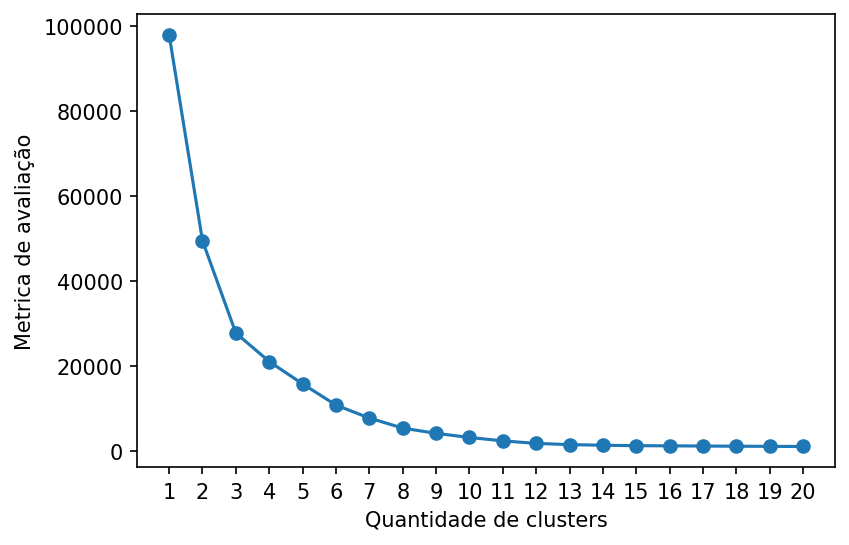

In [13]:
plt.plot(range(1, 21), distortions, marker="o")

plt.xlabel("Quantidade de clusters")
plt.ylabel("Metrica de avaliação")
plt.xticks(range(1, 21))

plt.show()

Baseado no gráfico escolhemos 13 como quantidade de clusters

### Criando o medelo com 13 grupos

In [14]:
modelo = KMeans(n_clusters=13)
modelo.fit(data)

KMeans(n_clusters=13)

### Predição

In [15]:
resposta = modelo.predict(data)

### Visualização

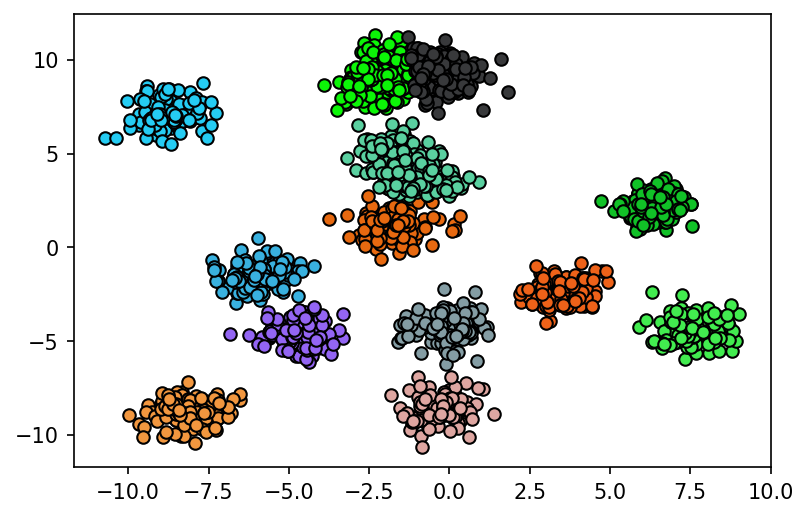

In [16]:
for i in range(13):
  grupo_i = data[resposta == i]
  plt.scatter(grupo_i[:, 0], grupo_i[:,1], c=np.random.rand(3), edgecolors="black")

plt.show()

### Métricas de Avaliação

In [17]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

sh = silhouette_score(data, modelo.labels_)
ch = calinski_harabasz_score(data, modelo.labels_)

print("SH:", sh)
print("CH:", ch)

SH: 0.6345099296468563
CH: 8736.746790590445
